In [1]:
import pandas as pd
import subprocess
import math
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [2]:
DATA_DIR = "/home/nasm716/row_hammer/row_hammer_data/"
DATA1=DATA_DIR+"25/bit_profiling_data.txt"
DATA1_1=DATA_DIR+"25/bitwise_threshold.txt"
DATA1_2=DATA_DIR+"25/bitwise_threshold1.txt"
DATA2=DATA_DIR+"25/threshold_data.txt"
# ION_LIN_SP = HYNIX_LIB_DIR + "ion_lin.sp"
# ION_SAT_SP = HYNIX_LIB_DIR + "ion_sat.sp"
# U0_SP = HYNIX_LIB_DIR + "u0_extraction.sp"
# UEFF_SP = HYNIX_LIB_DIR + "ueff_extraction.sp" 
# VSAT_SP = HYNIX_LIB_DIR + "vsat_extraction.sp"
# ION_RATIO_SP=HYNIX_LIB_DIR + "ion_ratio.sp"`

In [3]:
def profile_bit(data):
    f = open(data, 'r')
    failure_bit=dict()
    addr_dict=dict()
    retention_time=0
    bank=0
    for line in f:
        line=line.rstrip("\n")
        line=line.rstrip()
    #     display(line)
        line=line.split(' ')
#         display(line)
        if len(line)>1 and line[1]=="attack":
            bank=0
        elif line[0]=="00000003/4":
            bank=bank+1
    #         display(bank)
        elif len(line)==3:
            partial_address=list(map(lambda x:int(x,16),line))
            addr=(((partial_address[0]<<13)+(bank<<10)+(partial_address[1]))<<8)+partial_address[2]
    #         display(854<<21)
    #         display(addr,partial_address)
            try:
                addr_dict[addr]=addr_dict[addr]+1
            except KeyError:
                addr_dict.update({addr:1})

    #         if retention_time==0:
    #             retention_time=int(int(line[0],16)/1000)
    #         else:
    #             failure_bit[retention_time]=addr_list
    #             retention_time=int(int(line[0],16)/1000)
    #             addr_list=[]
    #     elif len(line)==3:
    #         bit_addr=int(line[0],16)*64+int(line[1],16)
    f.close()
#     display(addr_dict)
    return addr_dict


In [4]:
def count_freq(data, max_count):
    freq_list=np.zeros(max_count)
    for _, count in bit_dict.items():
        freq_list[count]= freq_list[count]+1
    index=np.arange(0,max_count)
    plt.bar(index,freq_list)
    plt.title("frequency of A's appearance", fontsize=15)
    plt.xlabel('count', fontsize=12)
    plt.ylabel('# of bits', fontsize=12)
#     plt.xticks(index, label, fontsize=15)
    plt.show()

In [5]:
def profile_victim_row(data):
    f = open(data, 'r')
    failure_bit=dict()
    addr_list=list()
    retention_time=0
    bank=-1
    for line in f:
        line=line.rstrip("\n")
        line=line.rstrip()
    #     display(line)
        line=line.split(' ')
#         display(line)
        if len(line)>1 and line[1]=="attack":
            bank=-1
        elif line[0]=="00000003/4":
            bank=bank+1
           # display(bank)
        elif len(line)==3:
            partial_address=list(map(lambda x:int(x,16),line))
            addr=(partial_address[0]<<13)+(bank<<10)+(partial_address[1])
            if(addr_list.count(addr)==0):
                addr_list.append(addr)

    #         if retention_time==0:
    #             retention_time=int(int(line[0],16)/1000)
    #         else:
    #             failure_bit[retention_time]=addr_list
    #             retention_time=int(int(line[0],16)/1000)
    #             addr_list=[]
    #     elif len(line)==3:
    #         bit_addr=int(line[0],16)*64+int(line[1],16)
    f.close()
#     display(addr_dict)
    return addr_list


In [6]:
def print_list2arr(list):
    print("int victim_row[",len(list) ,"] = {")
    for row in list:
        print(row,",", end=" ")
    print("};")

In [7]:
#bit_dict=profile_bit(DATA1)
print_list2arr(profile_victim_row(DATA1))

int victim_row[ 130 ] = {
6996828 , 10257007 , 16982678 , 21693348 , 38076494 , 46604834 , 52265684 , 66429909 , 67936906 , 101843354 , 123495402 , 125322092 , 9217981 , 20596352 , 39962566 , 51741843 , 60728725 , 67675390 , 85886085 , 87017093 , 91604579 , 92751648 , 97896118 , 98280501 , 100983900 , 110871865 , 122790934 , 129402072 , 7645697 , 85822034 , 11128116 , 18033871 , 21695669 , 24522119 , 33902260 , 35425369 , 44216243 , 50851402 , 56356361 , 56364752 , 65220526 , 65997835 , 67440232 , 70724963 , 76902064 , 97783447 , 100839347 , 102616764 , 106892778 , 110972053 , 116034717 , 121441857 , 126815815 , 2044685 , 14340381 , 31289678 , 43905587 , 48837284 , 70783239 , 78902080 , 83989469 , 87397085 , 89444694 , 91009170 , 93606212 , 111326093 , 113873830 , 126742710 , 1628015 , 6165905 , 14161621 , 19732149 , 25973912 , 27907911 , 46683713 , 48731374 , 65918369 , 69956933 , 72144653 , 81024373 , 82351846 , 84645589 , 87897292 , 89683169 , 97662398 , 101045453 , 101652458 , 1084

In [8]:
def bitwise_threshold(data):
    f = open(DATA1_2, 'r')
    threshold_dict=dict()
    bank=-1
    for line in f:
        line=line.rstrip("\n")
        line=line.rstrip()
    #     display(line)
        line=line.split(' ')
    #         display(line)
        threshold=int(line[2],16)
        if(threshold==0x10000000):
            threshold=-1
        try:
            threshold_dict[threshold]=threshold_dict[threshold]+1
        except KeyError:
            threshold_dict.update({threshold:1})
#         display(threshold_dict)
    #         if retention_time==0:
    #             retention_time=int(int(line[0],16)/1000)
    #         else:
    #             failure_bit[retention_time]=addr_list
    #             retention_time=int(int(line[0],16)/1000)
    #             addr_list=[]
    #     elif len(line)==3:
    #         bit_addr=int(line[0],16)*64+int(line[1],16)
    f.close()
    return threshold_dict
#     display(addr_dict)


In [9]:
def print_threshold(data):
#     for th in thredshold_list:
#         freq_list[count]= freq_list[count]+1
    plt.bar(index,data)
    plt.title("frequency of A's appearance", fontsize=15)
    plt.xlabel('count', fontsize=12)
    plt.ylabel('# of bits', fontsize=12)
#     plt.xticks(index, label, fontsize=15)
    plt.show()

{-1: 15,
 240000: 1,
 280000: 3,
 300000: 2,
 320000: 3,
 340000: 7,
 360000: 8,
 380000: 8,
 400000: 4,
 420000: 12,
 440000: 24,
 460000: 15,
 480000: 23}

,# of failed bits
240000,1
280000,3
300000,2
320000,3
340000,7
360000,8
380000,8
400000,4
420000,12
440000,24


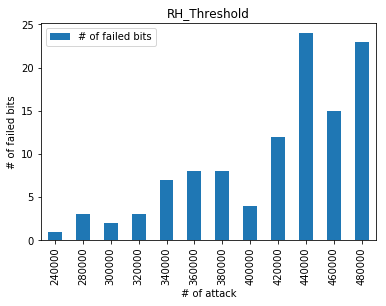

In [11]:
display(bitwise_threshold(DATA1_2))
lists=bitwise_threshold(DATA1_2)
lists.pop(-1, None)

data=pd.DataFrame(lists, index = ["# of failed bits"]).T
ax=data.plot.bar()
plt.title("RH_Threshold")
plt.xlabel("# of attack")
plt.ylabel("# of failed bits")
display(data)
# # # for python 2.x:
# # plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# # plt.xticks(range(len(D)), D.keys())  # in python 2.x

# plt.show()

In [12]:
def failure_bit(data):
    f = open(data, 'r')
    failure_bit=dict()
    addr_list=list()
    retention_time=0

    for line in f:
        line=line.split(" ")    
        if len(line)>1 and line[1]=="attack":
            if retention_time==0:
                retention_time=int(int(line[0],16)/1000)
            else:
                failure_bit[retention_time]=addr_list
                retention_time=int(int(line[0],16)/1000)
                addr_list=[]
        elif len(line)==3:
            bit_addr=int(line[0],16)*64+int(line[1],16)
            addr_list.append(bit_addr)
#     failure_bit[retention_time]=addr_list
#     count_bits(failure_bit)
    f.close()
    return failure_bit


In [13]:
def count_bits(failure_bit):
    count_data=pd.DataFrame()
    time_list=list(failure_bit.keys())
    time_list.sort()
    for retention_time in time_list:
         count_data[retention_time]=[len(failure_bit[retention_time])]
    count_data=count_data.T
    return count_data

In [14]:
def classify_failure_bits(failure_bit):
    classify_failure_bits=pd.DataFrame()
    time_list=list(failure_bit.keys())
    time_list.sort()
    idx=0
    past_key=0
    num_classify_data=0
    failed_cell=list()
    
    for retention_time in time_list:
#        print(retention_time ,":")
        idx=0
        unique=0
        non_repeat=0
        repeat=0
        num_failed_cell=len(failed_cell)
        for current_fail_addr in failure_bit[retention_time]:
            while(idx<len(failed_cell) and failed_cell[idx]<current_fail_addr):
                    idx=idx+1
            if(idx<len(failed_cell) and failed_cell[idx]==current_fail_addr):
                repeat=repeat+1
            else:
                unique=unique+1
                failed_cell.append(current_fail_addr)
        failed_cell.sort()
        non_repeat=len(failed_cell)-repeat-unique
        classify_failure_bits[retention_time]=[repeat,non_repeat,unique]
    
#         display(failed_cell)
#         print("repeat :", repeat)
#         print("non_repeat:", non_repeat) #non_repeat=total_cell-repeat-unique
#         print("unique:" ,unique)
    classify_failure_bits=classify_failure_bits.T
    classify_failure_bits=classify_failure_bits.rename(columns={0:'repeat',1:"non_repeat",2:"unique"});
    return classify_failure_bits 

In [15]:
def data_merge(data1,data2)
    data=pd.dataframe
    cond

SyntaxError: invalid syntax (<ipython-input-15-042b9c982a12>, line 1)

In [16]:
def graph(data):
    data.plot.bar(title="Row-Hammer Threshold")
    plt.xlabel("RHth(K)")
    plt.ylabel("# of fliped_bit")

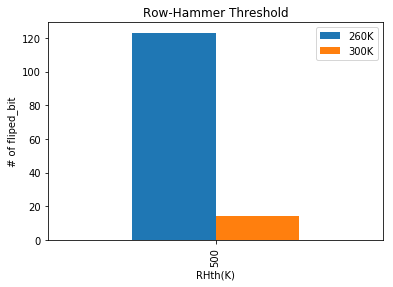

In [17]:
data1=count_bits(failure_bit(DATA1))
data2=count_bits(failure_bit(DATA2))
data=pd.DataFrame
data=pd.concat([data1,data2],axis=1)
data=data.dropna()
data.columns=["260K","300K"]
graph(data)

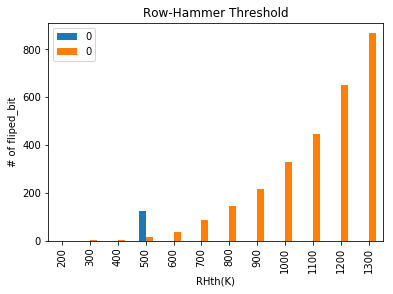

In [18]:

# data1=classify_failure_bits(failure_bit(DATA1))
# data2=classify_failure_bits(failure_bit(DATA2))
data1=count_bits(failure_bit(DATA1))
data2=count_bits(failure_bit(DATA2))

data=pd.concat([data1,data2],axis=1)
graph(data)

In [19]:
f = open(DATA1, 'r')
failure_bit=dict()
addr_list=list()
retention_time=0

for line in f:
    line=line.split(" ")
    if len(line)==1: #end of file    
        if(line[0]=="end"):
            failure_bit[retention_time]=addr_list
            break
        else:
            continue
    elif line[1]==":\n":
        if retention_time==0:
            retention_time=int(float(line[0]))
        else:
            failure_bit[retention_time]=addr_list
            retention_time=int(float(line[0]))
            addr_list=[]
    else:
#         print(line[0])
        bit_addr=int(float(line[0]))*64+int(float(line[1]))
        addr_list.append(bit_addr)
#count_bits(failure_bit)
failure_bit1=failure_bit
classify_data1=classify_failure_bits(failure_bit)
classify_data.plot
display(failure_bit)
f.close()

ValueError: could not convert string to float: '0007a120'

In [181]:
f = open(DATA2, 'r')
failure_bit=dict()
addr_list=list()
retention_time=0

for line in f:
    line=line.split(" ")
    if len(line)==1: #end of file    
        if(line[0]=="end"):
            failure_bit[retention_time]=addr_list
            break
        else:
            continue
    elif line[1]==":":
        if retention_time==0:
            retention_time=int(float(line[0]))
        else:
            failure_bit[retention_time]=addr_list
            retention_time=int(float(line[0]))
            addr_list=[]
    else:
#         print(line[0])
        bit_addr=int(float(line[0]))*64+int(float(line[1]))
        addr_list.append(bit_addr)
#count_bits(failure_bit)
failure_bit2=failure_bit
classify_data2=classify_failure_bits(failure_bit)
classify_data.plot
display(failure_bit)
f.close()

ValueError: could not convert string to float: '00030d40'

In [13]:
def compare_failure_bits(failure_bit1,failure_bit2):
    classify_failure_bits=pd.DataFrame()
    time_list=list(failure_bit.keys())
    time_list.sort()
    idx=0
    past_key=0
    num_classify_data=0
    failed_cell1=list()
    
    for retention_time in time_list:
#        print(retention_time ,":")
        idx=0
        unique=0
        non_repeat=0
        repeat=0
        num_failed_cell=len(failed_cell)
        for current_fail_addr in failure_bit1[retention_time]:
            while(idx<len(failed_cell1) and failed_cell1[idx]<current_fail_addr):
                    idx=idx+1
            if(idx<len(failed_cell1) and failed_cell1[idx]==current_fail_addr):
                repeat=repeat+1
            else:
                unique=unique+1
                failed_cell1.append(current_fail_addr)
        failed_cell1.sort()
        non_repeat=len(failed_cell)-repeat-unique
        
        idx=0
        unique=0
        non_repeat=0
        repeat=0
        num_failed_cell=len(failed_cell)
        for current_fail_addr in failure_bit2[retention_time]:
            while(idx<len(failed_cell2) and failed_cell2[idx]<current_fail_addr):
                    idx=idx+1
            if(idx<len(failed_cell2) and failed_cell2[idx]==current_fail_addr):
                repeat=repeat+1
            else:
                unique=unique+1
                failed_cell2.append(current_fail_addr)
        failed_cell2.sort()
        non_repeat=len(failed_cell2)-repeat-unique
        
        classify_failure_bits[retention_time]=[repeat,non_repeat,unique]
    
#         display(failed_cell)
#         print("repeat :", repeat)
#         print("non_repeat:", non_repeat) #non_repeat=total_cell-repeat-unique
#         print("unique:" ,unique)
    classify_failure_bits=classify_failure_bits.T
    classify_failure_bits=classify_failure_bits.rename(columns={0:'repeat',1:"non_repeat",2:"unique"});
    return classify_failure_bits 

In [14]:
compare_failure_bits(failure_bit1,failure_bit2)

NameError: name 'failure_bit1' is not defined